In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 2 ways:
# using l2 optimization (if i know my function): fix points as my interval and genrate more data points
# using quadratic spline (if i have lab data cant generate more): fix points as my interval and find the mid points of each 2 consecutive points
# I need: a method for trapezoidal, method for vandermonde, method for quadratic

66371.74211248287


In [256]:
# KNOWING THE FUNCTION, WITHOUT ANY INTERPOLATION

x = np.linspace(-50,50,1000)
delta = x[1]-x[0]
order = 2
n = len(x)

def f(x):
    return x**2

def TrapRule0(x, x_0, x_n, delta):
    approx_int = (f(x_n) + f(x_0)) * (delta/2)
    for i in x:
        if i > x_0 and i < x_n:
            approx_int += f(i) * delta
    return approx_int

x_0 = 10
x_n = 40
approx_int0 = TrapRule0(x, x_0, x_n, delta)
print(approx_int0)
# analytical value of integral: 21000

21148.18622025026


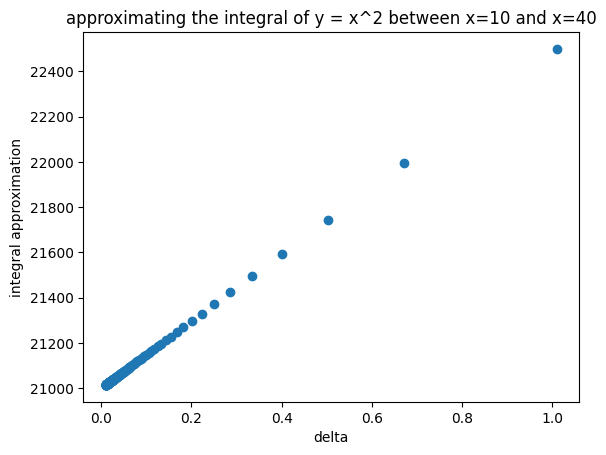

In [46]:
# USING L2 OPTIMIZATION, INTERPOLATE AND USE COEF MATRIX TO FIX MY INTERVAL
# WITHOUT USING f

def TrapRule(x, x_0, x_n, p_0, p_n, delta):
    approx_int = (p_0 + p_n) * (delta/2)
    for i in range(n):
        if x[i] > x_0 and x[i] < x_n:
            approx_int += y[i] * delta
    return approx_int
approx_int = []
delta_change = []

for i in range(100, 10000, 50):
   x = np.linspace(-50,50,i)
   delta = x[1]-x[0]
   order = 2
   n = len(x)

   y = x**2
   v = (np.reshape(x, (n, 1)) * np.ones(order + 1)) ** [i for i in range(order, -1, -1)]
   v_new = np.transpose(v) @ v
   y_matrix = np.transpose(v) @ y
   coef_matrix = np.linalg.solve(v_new, y_matrix)

   x_0 = 10
   x_n = 40
   p_0 = 0
   p_n = 0
   for j in range(order+1):
     p_0 += coef_matrix[len(coef_matrix) - (j+1)]* x_0**j
     p_n += coef_matrix[len(coef_matrix) - (j+1)]* x_n**j

   approx_int.append(TrapRule(x, x_0, x_n, p_0, p_n, delta))
   delta_change.append(delta)


plt.scatter(delta_change, approx_int)
plt.ylabel("integral approximation")
plt.xlabel("delta")
plt.title("approximating the integral of y = x^2 between x=10 and x=40")
plt.show()
# analytical value of integral: 21000

[0.049391090347224505, 0.057785657897755034, 0.06205955485154917, 0.06461388103871288, 0.06630938841315219, 0.06751735898535782, 0.06841882768271122, 0.06911990984684267, 0.06968085918833183, 0.07013830451680729, 0.07051904856388676, 0.07084040004489049, 0.07111553255858268, 0.07135505495077725, 0.07156301497582555, 0.0717482178833977, 0.07191120224193848, 0.07205710590773852, 0.07218820158902087, 0.07230742573034828, 0.07241580396025074, 0.07251404655052998, 0.07260404173702749, 0.07268718397813205, 0.07276450070432892, 0.07283544392398433, 0.07290107541307031, 0.07296243862399353, 0.0730196591846165, 0.0730732937097318, 0.07312347223725628, 0.07317053576822197, 0.07321467320397113, 0.07325686956328661, 0.07329627810249505, 0.0733335566699389, 0.07336885568164105, 0.07340296833779064, 0.07343470145887009, 0.07346468079114539, 0.07349351506606182, 0.0735209531071396, 0.07354722620387572, 0.07357239743230785, 0.0735964848187551, 0.0736193582859871, 0.07364146021580287, 0.073662591025201

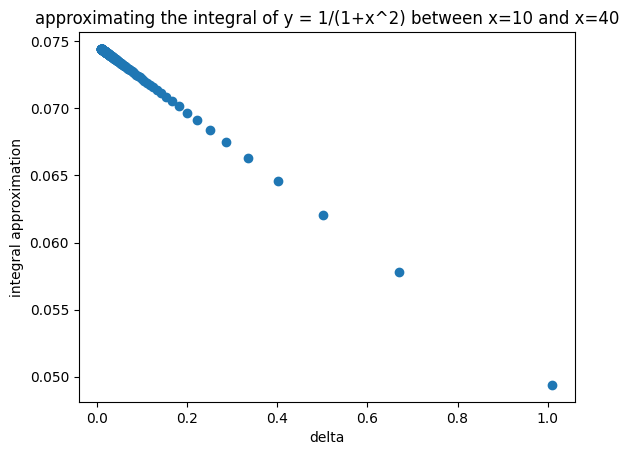

In [243]:
# USING L2 OPTIMIZATION, INTERPOLATE AND USE COEF MATRIX TO FIX MY INTERVAL
# WITHOUT USING f

def TrapRule(x, x_0, x_n, p_0, p_n, delta):
    n = len(x)
    approx_int = (p_0 + p_n) * (delta/2)
    for i in range(n):
        if x[i] > x_0 and x[i] < x_n:
            approx_int += y[i] * delta
    return approx_int
approx_int = []
delta_change = []

for i in range(100, 10000, 50):
   x = np.linspace(-50,50,i)
   delta = x[1]-x[0]
   order = 18
   n = len(x)

   y = 1/(1+x**2)
   v = (np.reshape(x, (n, 1)) * np.ones(order + 1)) ** [i for i in range(order, -1, -1)]
   v_new = np.transpose(v) @ v
   y_matrix = np.transpose(v) @ y
   coef_matrix = np.linalg.solve(v_new, y_matrix)

   x_0 = 10
   x_n = 40
   p_0 = 0
   p_n = 0
   for j in range(order+1):
     p_0 += coef_matrix[len(coef_matrix) - (j+1)]* x_0**j
     p_n += coef_matrix[len(coef_matrix) - (j+1)]* x_n**j

   approx_int.append(TrapRule(x, x_0, x_n, p_0, p_n, delta))
   delta_change.append(delta)

plt.scatter(delta_change, approx_int)
plt.ylabel("integral approximation")
plt.xlabel("delta")
plt.title("approximating the integral of y = 1/(1+x^2) between x=10 and x=40")
plt.show()
# analytical value of integral: 0.07467385887

[0.01387168095520198, 0.06144625781968424, 0.08071574492067558, 0.08236027447374981, 0.08204771440867949, 0.08478989797587894, 0.08625431445430551, 0.08632101732310374, 0.08631983950785886, 0.08648922980355801, 0.08658184758799917]
[5.2631578947368425, 2.6315789473684212, 1.3157894736842106, 0.6578947368421053, 0.32894736842105265, 0.16447368421052633, 0.08223684210526316, 0.04111842105263158, 0.02055921052631579, 0.010279605263157895, 0.005139802631578948]


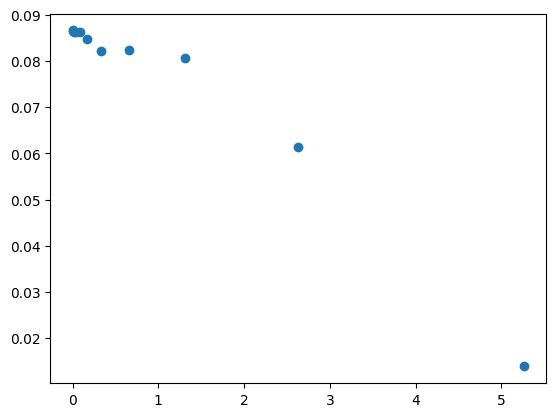

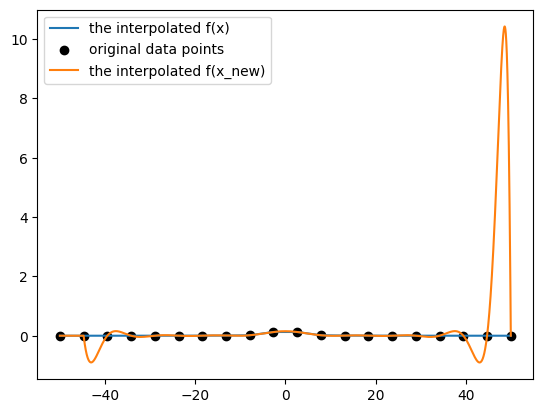

In [32]:
# L2 but now find middle and add the points (dont touch the linspace)
def TrapRule(x, y,x_0, x_n, p_0, p_n, delta):
    l = len(x)
    approx_int = (p_0 + p_n) * (delta/2)
    for i in range(l):
        if x[i] > x_0 and x[i] < x_n:
            approx_int += y[i] * delta
    return approx_int

x = np.linspace(-50,50,20)
y = 1/(1+x**2)
delta = x[1] - x[0]
order = 18
n = len(x)
approx_int = []
delta_change = []


v = (np.reshape(x, (n, 1)) * np.ones(order + 1)) ** [i for i in range(order, -1, -1)]
v_new = np.transpose(v) @ v
y_matrix = np.transpose(v) @ y
coef_matrix = np.linalg.solve(v_new, y_matrix)

p = 0
for i in range(order+1):
    p += coef_matrix[len(coef_matrix) - (i+1)]* x**i

x_0 = 10
x_n = 30
p_0 = 0
p_n= 0
for j in range(order+1):
     p_0 += coef_matrix[len(coef_matrix) - (j+1)]* x_0**j
     p_n += coef_matrix[len(coef_matrix) - (j+1)]* x_n**j
approx_int.append(TrapRule(x, y,x_0, x_n, p_0, p_n, delta))
delta_change.append(delta)


x_new = x
for o in range(10):
   y_new = 0
   for i in range(1,len(x_new)-1):
     x_t = (x_new[i] + x_new[i+1])/2
     x_new = np.append(x_new, x_t)
   x_new.sort()
   for j in range(order+1):
     y_new += coef_matrix[len(coef_matrix) - (j+1)]* x_new**j
   delta = delta/2
   approx_int.append(TrapRule(x_new, y_new,x_0, x_n, p_0, p_n, delta))
   delta_change.append(delta)

print(approx_int)
print(delta_change)
plt.scatter(delta_change, approx_int)
plt.show()
plt.plot(x, p, label = "the interpolated f(x)")
plt.scatter(x,y, label = "original data points", color = "k")
plt.plot(x_new, y_new, label = "the interpolated f(x_new)")
plt.legend()
plt.show()

# analytical value of integral: 0.07467385887

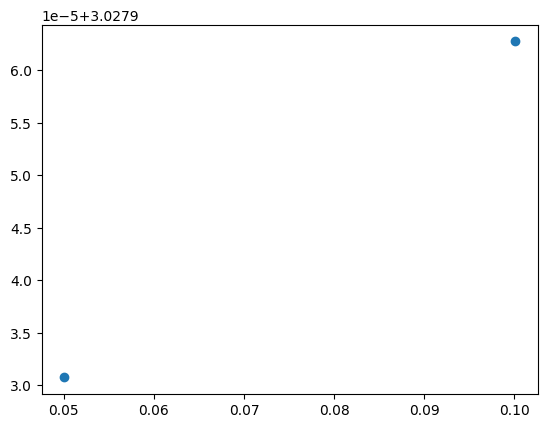

[3.027962726010346, 3.0279307465142278]
[0.10010010010010006, 0.05005005005005003]


In [160]:
# if I do not have access to the generating function: quadratic splines for the original data set and then take middle points recursively??

def QuadSplinesX(x, n):
    x_matrix = np.zeros((3*n, 3*n))
    # fill 2n rows:
    for i in range(0, 2*n -1, 2):
      row1 = []
      row2 = []
      for j in range(i - int(i/2)):
         row1.append(0)
         row1.append(0)
         row1.append(0)
         row2.append(0)
         row2.append(0)
         row2.append(0)
      row1.append(x[i-int(i/2)]**2)
      row1.append(x[i - int(i/2)])
      row1.append(1)
      row2.append(x[i-int(i/2) + 1]**2)
      row2.append(x[i-int(i/2) + 1])
      row2.append(1)
      if len(row1) < 3*n:
        for o in range(3*n - len(row1)):
            row1.append(0)
            row2.append(0)
      x_matrix[i] = row1
      x_matrix[i+1] = row2

    # fill n - 1 rows:
    for i in range(1, n):
      row = []
      for j in range(1, i):
           row.append(0)
           row.append(0)
           row.append(0)
      row.append(2*x[i])
      row.append(1)
      row.append(0)
      row.append(- 2* x[i])
      row.append(-1)
      if len(row) < 3*n:
         for o in range(3*n - len(row)):
             row.append(0)
      x_matrix[2*n - 1 + i] = row
    # last row of zeros
    x_matrix = np.delete(x_matrix, obj = 0, axis = 1)
    x_matrix = np.delete(x_matrix, obj = 3*n - 1, axis = 0)
    return x_matrix

def QuadSplinesY(y, n):
    y_matrix = np.zeros((3*n - 1, 1))
    y_matrix[0] = y[0]
    y_matrix[2*n - 1] = y[len(y) -1]
    for i in range(1, 2*n -1, 2):
       y_matrix[i] = y[i + 1 - int((i+1)/2)]
       y_matrix[i+1] = y[i + 1 - int((i+1)/2)]
    return y_matrix

def TrapRule(x, y,x_0, x_n, p_0, p_n, delta):
    l = len(x)
    approx_int = (p_0 + p_n) * (delta/2)
    for i in range(l):
        if x[i] > x_0 and x[i] < x_n:
            approx_int += y[i] * delta
    return approx_int


x = np.linspace(-50,50,1000)
n = len(x) - 1
y = 1/(1+x**2)
delta = x[1]-x[0]
order = 2
x_matrix = QuadSplinesX(x,n)
y_matrix = QuadSplinesY(y,n)

unknown_matrix = np.linalg.solve(x_matrix, y_matrix)

approx_int = []
delta_count = []
approx_int.append(TrapRule(x,y,x_0, x_n, p_0,p_n, delta))
delta_count.append(delta)
x_0 = -39.79591836734694 #x[5]
x_n = 11.224489795918366 #x[30]
p_0 = 0.0006310282448873175 #y[5]
p_n = 0.007874687193548072 #y[30]
x_new = x
y_new = y
for i in range(1, n):
   x_t = (x[i] + x[i+1])/2
   y_t = unknown_matrix[3*i - 1] * x_t**2 + unknown_matrix[3*i] * x_t + unknown_matrix[3*i + 1]
   x_new = np.append(x_new, x_t)
   y_new = np.append(y_new, y_t)
delta = delta/2
delta_count.append(delta)
approx_int.append(TrapRule(x_new, y_new, x_0, x_n, p_0, p_n, delta))
plt.scatter(delta_count,approx_int )
plt.show()
print(approx_int)
print(delta_count)

# analytical value of integral: 3.027613421
# AS I REDUCE THE WIDTH BY A FACTOR OF 2, THE ANSWER GETS FARTHER FROM THE ANALYTICAL ANSWER